In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
import numpy as np
import seaborn as sns
import glob
import re

In [ ]:
#!rm -r Results
!g++ Proyect.cpp -o ICDF.out
#!mkdir Results

In [ ]:
#Corremos la simulacion
!./ICDF.out

In [ ]:
#Lectura Alternativa del DF
DF = pd.read_csv('./Results/_South_180_Complete_trend_analysis.dat', sep = ' ')

In [ ]:
#Sacamos el N mas frecuente
N_most_frequent = DF.groupby('Iteration').max().reset_index()[['Iteration','#Autos']]
N = N_most_frequent["#Autos"].mode()[0]
iterations = N_most_frequent[N_most_frequent['#Autos'] == N].Iteration.unique()

In [ ]:
print(DF.groupby('Iteration').max().reset_index()[['Iteration','#Autos']].mean())
print(DF.groupby('Iteration').max().reset_index()[['Iteration','#Autos']].std())

In [ ]:
DF.groupby('Iteration').max().reset_index()[['Iteration','#Autos']]['#Autos'].value_counts()

In [ ]:
#Seleccionamos todos los procesos que contengan al N mas frecuente
DF_ = DF[DF.Iteration.isin(iterations)]

In [ ]:
#Revisamos las estadisticas de los resultados 
stats = pd.pivot_table(DF_, index = 'Iteration', values = 'Delta_t', aggfunc = [np.mean,np.std, np.median, skew])

In [ ]:
stats.sort_values(('std','Delta_t'))

In [ ]:
#Seleccionamos una simulacion que tenga resultados mas cercanos a los reales

In [ ]:
DF_ = DF_[DF_.Iteration.isin([25930])]

In [ ]:
#Hacemos el trend analysis de la region North
#Ajustamos Minimos cuadrados
x = np.array(DF_['#Autos']).reshape(-1, 1)
y = np.array(DF_['Delta_t']).reshape(-1, 1)
linreg = LinearRegression().fit(x,y)

In [ ]:
print('Intercept: {}'.format(linreg.intercept_))
print('Coef: {}'.format(linreg.coef_))

In [ ]:
plt.scatter(x,y)
ax = plt.gca()
ax.set_xlabel('Vehicle Count')
ax.set_ylabel('Time Intervals')
plt.plot(x,linreg.intercept_+linreg.coef_*x, color='r')

# Analisis de colas

In [17]:
colas = pd.read_csv('Cola_final.dat', sep = " ")

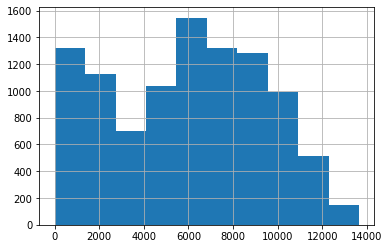

In [18]:
colas.sum(axis = 1).hist()

In [19]:
colas.sum(axis = 1).max()

13646.0

In [20]:
colas.sum(axis = 1).value_counts()

7328.0    20
6126.0    18
1335.0    18
5768.0    16
11.0      16
          ..
646.0      1
2824.0     1
8201.0     1
8706.0     1
6744.0     1
Length: 3774, dtype: int64

# NO BORRAR

#Creamos lista de DF
DF = pd.DataFrame()
for i in glob.glob('./Results/*.dat'):
    data = pd.read_csv(i, sep = " ")
    data['Iteration'] = int(re.findall(r'\d+',i)[0])
    DF =  pd.concat([DF,data],ignore_index=True)